In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
import shapefile as shp
from matplotlib.patches import Polygon
import xarray as xr

In [2]:
## To read shapefiles
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = records =[list(i) for i in sf.records()]
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [3]:
## To plot the data from shapefiles, the cells below are the same but for different colors.
def draw_screen_poly(m, coords):
    lons = []
    for i in coords:
        lons.append(i[0])
    
    lats = []
    for i in coords:
        lats.append(i[1])
    
    x, y = m( lons, lats )
    xy = zip(x,y)
    poly = Polygon( list(xy), facecolor='orange', alpha=0.5, edgecolor='k')
    plt.gca().add_patch(poly)

In [4]:
def draw_screen_yellow(m, coords):
    lons = []
    for i in coords:
        lons.append(i[0])
    
    lats = []
    for i in coords:
        lats.append(i[1])
    
    x, y = m( lons, lats )
    xy = zip(x,y)
    poly = Polygon( list(xy), facecolor='Yellow', fill=True, edgecolor='k', alpha=0.2)
    plt.gca().add_patch(poly)

In [5]:
def draw_screen_black(m, coords):
    lons = []
    for i in coords:
        lons.append(i[0])
    
    lats = []
    for i in coords:
        lats.append(i[1])
    
    x, y = m( lons, lats )
    xy = zip(x,y)
    poly = Polygon(list(xy), facecolor="none", edgecolor='k')
    plt.gca().add_patch(poly)

In [6]:
def draw_screen_points(m, coords):
    lons = []
    for i in coords:
        lons.append(i[0])
    
    lats = []
    for i in coords:
        lats.append(i[1])
    
    x, y = m( lons, lats )
    xy = zip(x,y)
    poly = Polygon(list(xy), facecolor="none", edgecolor='k', ls='--')
    plt.gca().add_patch(poly)

# Delimitation of potential zones for offshore wind energy in the Gulf of Mexico
Diego Arturo Canul Reyes | dacr@ier.unam.mx

This script run on Python3 and are necessary the packages in the cell above. **Basemap** is to plot the maps. The **xarray** library is used to manipulate data from the reanalysis models, I used data from ERA5 but for this script is not required because I provide the results of the calculations from the models in a csv file but required for read the data from bathymetry.

**shp** and **Polygon** are used to read and plot data from shapefiles which have geographical information. 

The methodology I implement to delimit the potential zones is divided in two stages:
1. Wind Resource analysis
2. Natural and technical constrains

## Study area

The study area is delimit from -100 to -80 lon and 17 to 33 lat (fig below), this region include all the Gulf of Mexico including the USA area, later the study is restricted only to the area of Mexico (Economic Exclusive Zone). 

Text(3891820.5999638415, 2602188.8097733944, 'Gulf of Mexico')

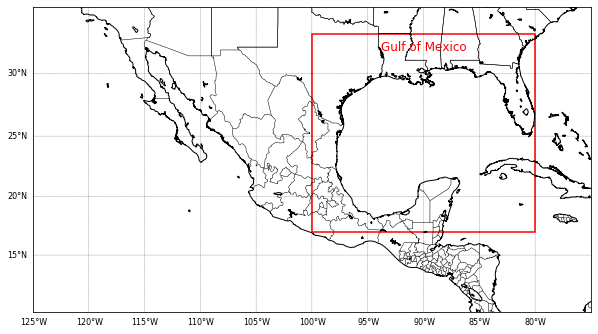

In [7]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)



m = Basemap(resolution='i', projection='merc', llcrnrlat=10, llcrnrlon=-125, urcrnrlat=35, urcrnrlon=-75)

m.drawparallels(np.arange(10,35,5), labels=[1,0,0,0], fontsize=8, linewidth=0.3, color='k')
m.drawmeridians(np.arange(-125,-75,5),labels=[0,0,0,1], fontsize=8, linewidth=0.3, color='k')
m.drawcountries()
m.drawcoastlines()
m.drawstates()


m.fillcontinents(color='white')


#gm
x1, y1 = m(-100,33)
x2, y2 = m(-80, 33)
x3, y3 = m(-80, 17)
x4, y4 = m(-100, 17)

poly = Polygon([(x1,y1),(x2,y2),(x3,y3),(x4,y4)],facecolor='none',edgecolor='r',linewidth=1.5)
plt.gca().add_patch(poly)

x,y = m(-90,31.7)
plt.text(x,y,'Gulf of Mexico',horizontalalignment='center', color='r', fontsize=12)

## 1. Wind Resource

The *u* and *v* components of the wind speeds are obtained from ERA5 (to the grid of the Gulf of Mexico) at 10m height and then the wind speeds (WS) are calculated as $$WS_{10} = \sqrt{u_{10}^2+v_{10}^2}$$ then, the WS are extrapolated at 119m, hub height of the DTU 10 MW reference wind turbine using the logarithmic profile: $$\frac{U(z)}{U(z_r)} = \bigg(\frac{z}{z_r}\bigg)^{0.11}$$**

** https://journals.ametsoc.org/jamc/article/33/6/757/15036/Determining-the-Power-Law-Wind-Profile-Exponent


The power curve of the DTU wind turbine is showed below:

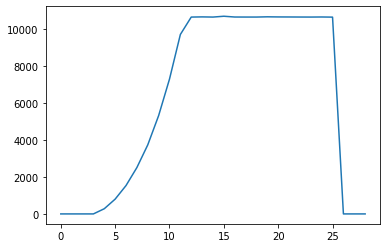

In [8]:
#Definir curva
velocidades = np.linspace(0,28,29)
power = [0, 0, 0, 0, 280.2, 799.1, 1532.7, 2506.1, 3730.7, 5311.8, 7286.5, 9698.3, 10639.1, 10648.5, 10639.3, 10683.7, 10642.0, 10640.0, 10639.9, 10652.8, 10646.2, 10644.0, 10641.2, 10639.5, 10643.6, 10635.7, 0, 0, 0]

plt.plot(velocidades, power)


The data from the model are hourly available, for the 39 years there is a total of 341880 hours. The power curves of the wind turbines are directly evaluated for each point of the grids and for each temporal step (hourly) and divided by the total time to get the capacity factor. In this first stage, the zones with the highst capacity factors are at the Northwest of Yucatan Peninsula and at the east of Tamaulipas. The map of the capacity factors above 30% is showed below:

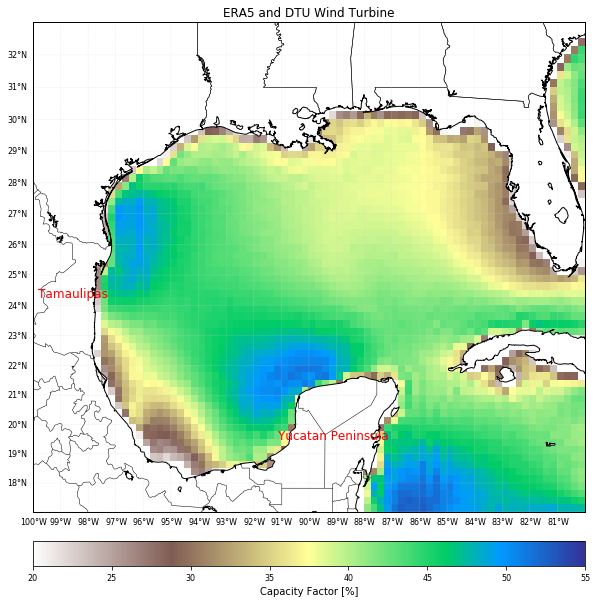

In [10]:
plt.figure(figsize=(10,10))
map = Basemap(projection='merc',llcrnrlon=-100,llcrnrlat=17,urcrnrlon=-80,urcrnrlat=33,resolution='i')
#map.fillcontinents(color='#ddaa66',lake_color='aqua')

map.drawcoastlines()
map.drawmapboundary()
map.drawcountries()
map.drawstates()
map.drawparallels(np.arange(17, 33, 1), labels=[1,0,0,0], fontsize=8, linewidth=0.3, color='lightgray')
map.drawmeridians(np.arange(-100., -80., 1), labels=[0,0,0,1], fontsize=8, linewidth=0.3, color='lightgray')

    
##############
#Wind
file = np.loadtxt('potencia_era_dtu.csv')
file = file/(10640*341880)*100
#file[file<30]=np.nan

lons = np.loadtxt('era_lon.csv')-360
lats = np.loadtxt('era_lat.csv')
lon, lat = np.meshgrid(lons, lats)
xi, yi = map(lon, lat)
cs = map.pcolormesh(xi,yi,file, cmap=cm.terrain_r, vmin=20, vmax=55)
#map.fillcontinents(color = 'bisque')
# Add Colorbar
cbar = map.colorbar(cs, location='bottom', pad="6%")
cbar.set_label('Capacity Factor [%]')
cbar.ax.tick_params(labelsize=8)

x,y = map(-98.563,24.287)
plt.text(x,y,'Tamaulipas',horizontalalignment='center', color='r', fontsize=12)

x,y = map(-89.125,19.5)
plt.text(x,y,'Yucatan Peninsula',horizontalalignment='center', color='r', fontsize=12)

map.fillcontinents(color='white')
plt.title('ERA5 and DTU Wind Turbine', fontsize = 12)
plt.show()

## 2. Natural and technical constrains

From the literature, I considered the next restrictions to delimit the potential areas:
- Economic Exclusive Zone (the areas must be inside the EEZ of Mexico)
- Bathymetry (for bottom-fixed structures, the depth from the seabed to the ocean must be below 50m)
- Natural Protected Zones (must be avoided)

As an additional restrictions, the capacity factor must be above 30%

In the next cells, the maps for each constrains are showed:

### 2.1 EEZ
Obtained: http://www.marineregions.org/downloads.php

In [11]:
eez_iho = shp.Reader('./EEZ_land_V1/EEZ_land_v1.shp',encoding='ISO8859-1')
eez_iho = read_shapefile(eez_iho)
eez_iho = eez_iho[eez_iho.Country == 'Mexico']
eez_iho = np.asarray(eez_iho.iloc[0].coords)

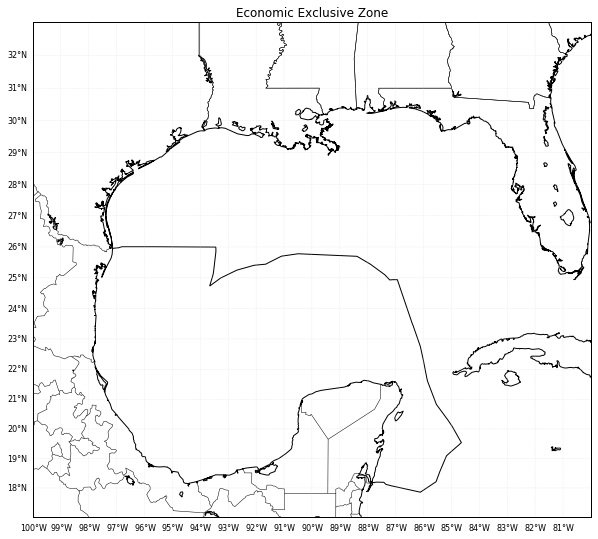

In [12]:
plt.figure(figsize=(10,10))
map = Basemap(projection='merc',llcrnrlon=-100,llcrnrlat=17,urcrnrlon=-80,urcrnrlat=33,resolution='i')
#map.fillcontinents(color='#ddaa66',lake_color='aqua')

map.drawcoastlines()
map.drawmapboundary()
map.drawcountries()
map.drawstates()
map.drawparallels(np.arange(17, 33, 1), labels=[1,0,0,0], fontsize=8, linewidth=0.3, color='lightgray')
map.drawmeridians(np.arange(-100., -80., 1), labels=[0,0,0,1], fontsize=8, linewidth=0.3, color='lightgray')


##############
#EEZ
draw_screen_black(map, eez_iho)

map.fillcontinents(color='white')
plt.title('Economic Exclusive Zone', fontsize = 12)
plt.show()

### 2.2 Protected Areas
Obtained: https://www.protectedplanet.net/

In [13]:
wm = shp.Reader('./wdpa/WDPA_Aug2019_MEX-shapefile-polygons.shp',encoding='ISO8859-1')
wm_df = read_shapefile(wm)
MEX=wm_df
mex = []
i = 0
while i < 1192:
    mex.append(np.asarray(MEX.iloc[i].coords))
    i += 1

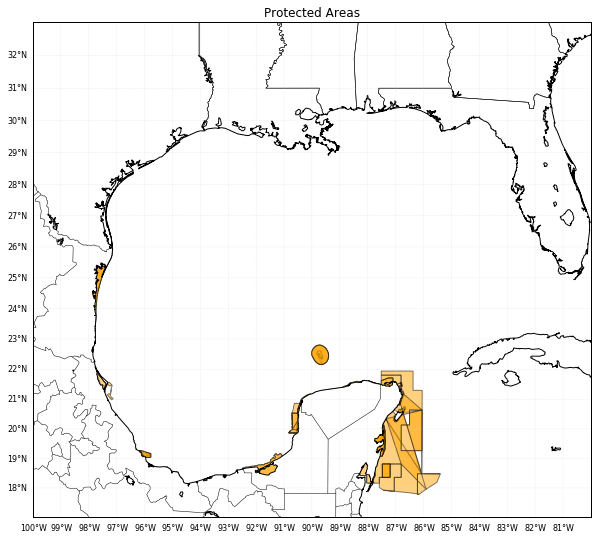

In [14]:
plt.figure(figsize=(10,10))
map = Basemap(projection='merc',llcrnrlon=-100,llcrnrlat=17,urcrnrlon=-80,urcrnrlat=33,resolution='i')
#map.fillcontinents(color='#ddaa66',lake_color='aqua')

map.drawcoastlines()
map.drawmapboundary()
map.drawcountries()
map.drawstates()
map.drawparallels(np.arange(17, 33, 1), labels=[1,0,0,0], fontsize=8, linewidth=0.3, color='lightgray')
map.drawmeridians(np.arange(-100., -80., 1), labels=[0,0,0,1], fontsize=8, linewidth=0.3, color='lightgray')


##############
#WHP
for i in range(len(mex)):
    draw_screen_poly(map, mex[i]);

map.fillcontinents(color='white')
plt.title('Protected Areas', fontsize = 12)
plt.show()

### 2.3 GEBCO
Obtained: https://www.gebco.net/

In [15]:
gebco = xr.open_dataset('GEBCO_2019_-120.3189_34.6763_-79.658_15.1747_mexico.nc')
gebco = gebco.where(gebco.lat >= 17, drop = True)
gebco = gebco.where(gebco.lon >= -99.375, drop = True)

elevuns = np.asarray(gebco.variables['elevation'])

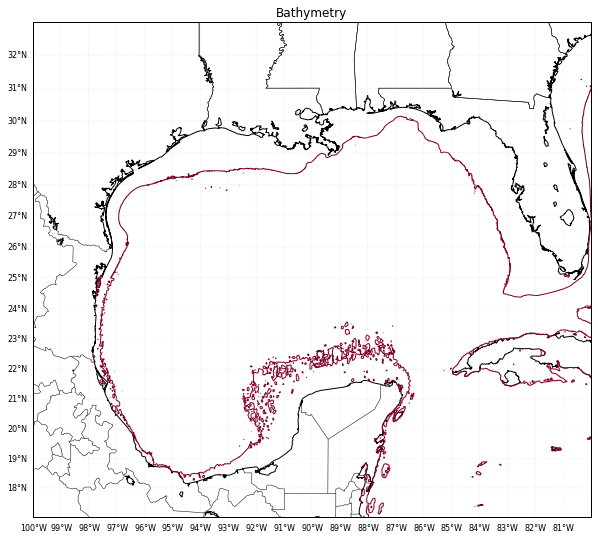

In [16]:
plt.figure(figsize=(10,10))
map = Basemap(projection='merc',llcrnrlon=-100,llcrnrlat=17,urcrnrlon=-80,urcrnrlat=33,resolution='i')
#map.fillcontinents(color='#ddaa66',lake_color='aqua')

map.drawcoastlines()
map.drawmapboundary()
map.drawcountries()
map.drawstates()
map.drawparallels(np.arange(17, 33, 1), labels=[1,0,0,0], fontsize=8, linewidth=0.3, color='lightgray')
map.drawmeridians(np.arange(-100., -80., 1), labels=[0,0,0,1], fontsize=8, linewidth=0.3, color='lightgray')

##############
#GEBCO
lons = gebco.variables['lon']
lats = gebco.variables['lat']
lon, lat = np.meshgrid(lons, lats)
xi, yi = map(lon,lat)
plt.contour(xi,yi, elevuns, [-50], cmap=cm.YlOrRd_r, linewidths=1)

map.fillcontinents(color='white')
plt.title('Bathymetry', fontsize = 12)
plt.show()

### Delimitation of Potential Zones
A map with all the constrains considered above is showed below:

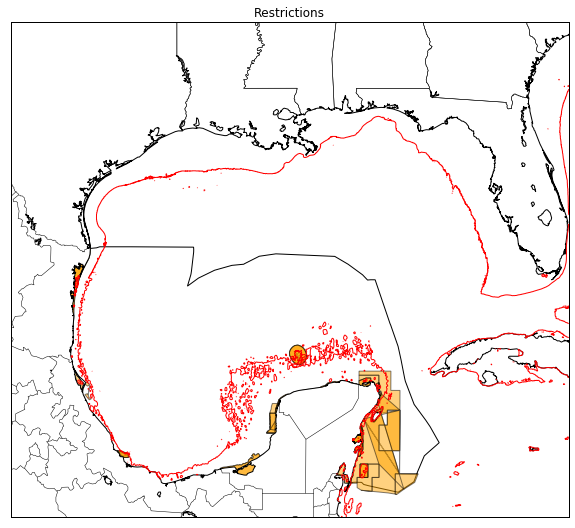

In [17]:
plt.figure(figsize=(10,10))
map = Basemap(projection='merc',llcrnrlon=-100,llcrnrlat=17,urcrnrlon=-80,urcrnrlat=33,resolution='i')
#map.fillcontinents(color='#ddaa66',lake_color='aqua')

map.drawcoastlines()
map.drawmapboundary()
map.drawcountries()
map.drawstates()
#map.drawparallels(np.arange(17, 33, 1), labels=[1,0,0,0], fontsize=8, linewidth=0.3, color='lightgray')
#map.drawmeridians(np.arange(-100., -80., 1), labels=[0,0,0,1], fontsize=8, linewidth=0.3, color='lightgray')


###############
##EEZ
draw_screen_black(map, eez_iho)

###############
##WHP
for i in range(len(mex)):
    draw_screen_poly(map, mex[i]);
    

##############
#GEBCO
lons = gebco.variables['lon']
lats = gebco.variables['lat']
lon, lat = np.meshgrid(lons, lats)
xi, yi = map(lon,lat)
map.contour(xi,yi, elevuns, [-50], cmap=cm.bwr_r, linewidths=1)
#cbar = map.colorbar(cs, location='bottom', pad="6%")
#cbar.set_label('Height [m]')
#cbar.ax.tick_params(labelsize=8)

map.fillcontinents(color='white')
plt.title('Restrictions', fontsize = 12)
plt.show()

To delimit the potential zones, the natural and technical constrains are considered, and also a capacity factor above 30%

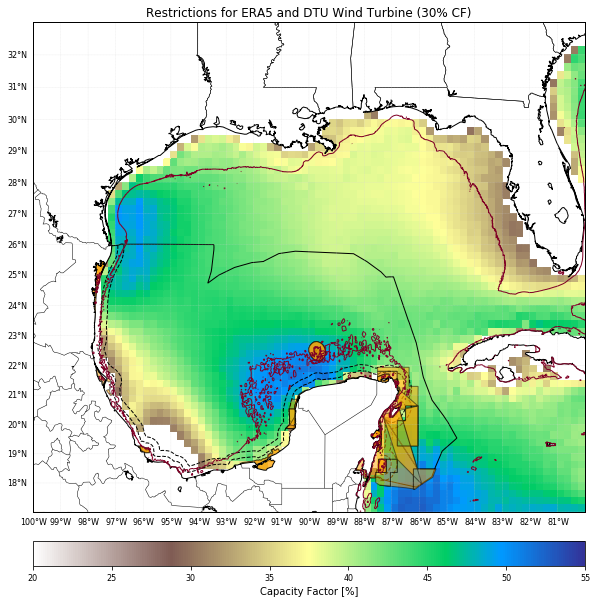

In [25]:
plt.figure(figsize=(10,10))
map = Basemap(projection='merc',llcrnrlon=-100,llcrnrlat=17,urcrnrlon=-80,urcrnrlat=33,resolution='i')
#map.fillcontinents(color='#ddaa66',lake_color='aqua')

map.drawcoastlines()
map.drawmapboundary()
map.drawcountries()
map.drawstates()
map.drawparallels(np.arange(17, 33, 1), labels=[1,0,0,0], fontsize=8, linewidth=0.3, color='lightgray')
map.drawmeridians(np.arange(-100., -80., 1), labels=[0,0,0,1], fontsize=8, linewidth=0.3, color='lightgray')

##############
# 24millas
sea_mex = np.loadtxt('./continuos_zone.txt')
draw_screen_points(map, sea_mex)

##############
#EEZ
draw_screen_black(map, eez_iho)

##############
#WHP
for i in range(len(mex)):
    draw_screen_poly(map, mex[i]);
    
##############
#Wind
file = np.loadtxt('potencia_era_dtu.csv')
file = file/(10640*341880)*100
file[file<30]=np.nan

lons = np.loadtxt('era_lon.csv')-360
lats = np.loadtxt('era_lat.csv')
lon, lat = np.meshgrid(lons, lats)
xi, yi = map(lon, lat)
cs = map.pcolormesh(xi,yi,file, cmap=cm.terrain_r, vmin=20, vmax=55)
#map.fillcontinents(color = 'bisque')
# Add Colorbar
cbar = map.colorbar(cs, location='bottom', pad="6%")
cbar.set_label('Capacity Factor [%]')
cbar.ax.tick_params(labelsize=8)

##############
#GEBCO
lons = gebco.variables['lon']
lats = gebco.variables['lat']
lon, lat = np.meshgrid(lons, lats)
xi, yi = map(lon,lat)
plt.contour(xi,yi, elevuns, [-50], cmap=cm.YlOrRd_r, linewidths=1)

map.fillcontinents(color='white')
plt.title('Restrictions for ERA5 and DTU Wind Turbine (30% CF)', fontsize = 12)
plt.show()

Finally, considered all the restrictions, two potential zones are considered: the east of Tamaulipas, and the Northwest of Yucatan Peninsula, each area is showed next:

### Península

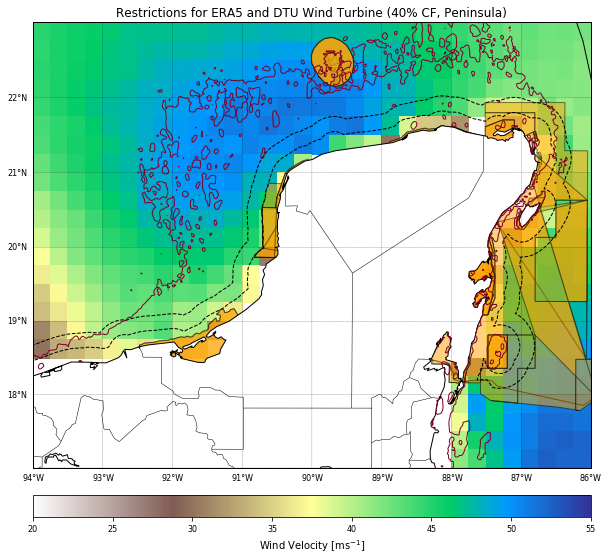

Wall time: 1min 2s


In [21]:
%%time
plt.figure(figsize=(10,10))
map = Basemap(projection='merc',llcrnrlon=-94,llcrnrlat=17,urcrnrlon=-86,urcrnrlat=23,resolution='i')
#map.fillcontinents(color='#ddaa66',lake_color='aqua')

map.drawcoastlines()
map.drawmapboundary()
map.drawcountries()
map.drawstates()
map.drawparallels(np.arange(17, 33, 1), labels=[1,0,0,0], fontsize=8, linewidth=0.3)
map.drawmeridians(np.arange(-100., -80., 1), labels=[0,0,0,1], fontsize=8, linewidth=0.3)

##############
#EEZ
draw_screen_black(map, eez_iho)

##############
#WHP
for i in range(len(mex)):
    draw_screen_poly(map, mex[i]);
    
##############
#Wind
file = np.loadtxt('potencia_era_dtu.csv')
file = file/(10640*341880)*100
file[file<30]=np.nan

lons = np.loadtxt('era_lon.csv')-360
lats = np.loadtxt('era_lat.csv')
lon, lat = np.meshgrid(lons, lats)
xi, yi = map(lon, lat)
cs = map.pcolormesh(xi,yi,file, cmap=cm.terrain_r, vmin=20, vmax=55)
#map.fillcontinents(color = 'bisque')
# Add Colorbar
cbar = map.colorbar(cs, location='bottom', pad="6%")
cbar.set_label('Wind Velocity [ms$^{-1}$]')
cbar.ax.tick_params(labelsize=8)

##############
#GEBCO
lons = gebco.variables['lon']
lats = gebco.variables['lat']
lon, lat = np.meshgrid(lons, lats)
xi, yi = map(lon,lat)
plt.contour(xi,yi, elevuns, [-50], cmap=cm.YlOrRd_r, linewidths=1)

sea_mex = np.loadtxt('./continuos_zone.txt')
draw_screen_points(map, sea_mex)

map.fillcontinents(color='white')
plt.title('Restrictions for ERA5 and DTU Wind Turbine (40% CF, Peninsula)', fontsize = 12)
plt.show()

### Tamaulipas

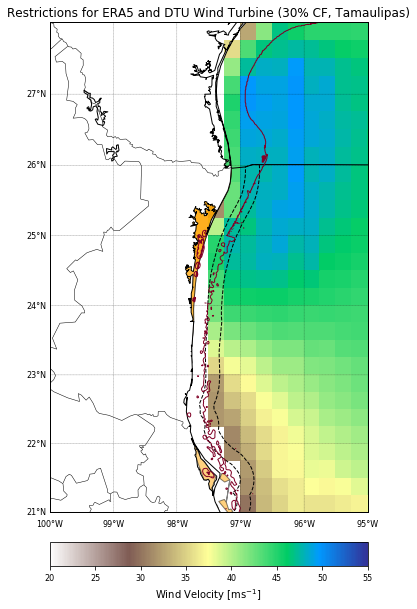

In [22]:
plt.figure(figsize=(10,10))
map = Basemap(projection='merc',llcrnrlon=-100,llcrnrlat=21,urcrnrlon=-95,urcrnrlat=28,resolution='i')
#map.fillcontinents(color='#ddaa66',lake_color='aqua')

map.drawcoastlines()
map.drawmapboundary()
map.drawcountries()
map.drawstates()
map.drawparallels(np.arange(17, 33, 1), labels=[1,0,0,0], fontsize=8, linewidth=0.3)
map.drawmeridians(np.arange(-100., -80., 1), labels=[0,0,0,1], fontsize=8, linewidth=0.3)


##############
#EEZ
draw_screen_black(map, eez_iho)

##############
#WHP
for i in range(len(mex)):
    draw_screen_poly(map, mex[i]);
    
##############
#Wind
file = np.loadtxt('potencia_era_dtu.csv')
file = file/(10640*341880)*100
file[file<30]=np.nan

lons = np.loadtxt('era_lon.csv')-360
lats = np.loadtxt('era_lat.csv')
lon, lat = np.meshgrid(lons, lats)
xi, yi = map(lon, lat)
cs = map.pcolormesh(xi,yi,file, cmap=cm.terrain_r, vmin=20, vmax=55)
#map.fillcontinents(color = 'bisque')
# Add Colorbar
cbar = map.colorbar(cs, location='bottom', pad="6%")
cbar.set_label('Wind Velocity [ms$^{-1}$]')
cbar.ax.tick_params(labelsize=8)

##############
#GEBCO
lons = gebco.variables['lon']
lats = gebco.variables['lat']
lon, lat = np.meshgrid(lons, lats)
xi, yi = map(lon,lat)
plt.contour(xi,yi, elevuns, [-50], cmap=cm.YlOrRd_r, linewidths=1)

sea_mex = np.loadtxt('./continuos_zone.txt')
draw_screen_points(map, sea_mex)

map.fillcontinents(color='white')
plt.title('Restrictions for ERA5 and DTU Wind Turbine (30% CF, Tamaulipas)', fontsize = 12)
plt.show()